In [44]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import numexpr as ne
from pandas.tseries.offsets import MonthEnd

# Problem 1

In [45]:
# Creating DataFrame
sp500 = pd.read_csv('weni7z9lm0qu7sul.csv')

In [46]:
sp500.shape

(1165, 11)

In [47]:
sp500.head()

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
0,1925-12-31,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,12.46,NaN
1,1926-01-30,-0.001783,-0.003980,0.006457,0.003250,15277664.0,89,15236829.5,79.0,12.74,0.022472
2,1926-02-27,-0.033296,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81.0,12.18,-0.043956
3,1926-03-31,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81.0,11.46,-0.059113
4,1926-04-30,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82.0,11.72,0.022688


In [48]:
sp500.columns

Index(['caldt', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'totval', 'totcnt',
       'usdval', 'usdcnt', 'spindx', 'sprtrn'],
      dtype='object')

In [49]:
infla = pd.read_csv('vif61oycy9y6jf7b.csv')

In [50]:
infla.shape

(1165, 11)

In [51]:
infla.head()

,caldt,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
0,1925-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004042,0.002951,0.000000
2,1926-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003237,0.002768,0.000000
3,1926-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002778,0.002778,-0.005587
4,1926-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003072,0.003072,0.005618


In [52]:
infla.columns

Index(['caldt', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret',
       'b1ret', 't90ret', 't30ret', 'cpiret'],
      dtype='object')

In [53]:
sp500['caldt'] = pd.to_datetime(sp500['caldt'])
sp500['caldt'] = pd.to_datetime(sp500['caldt'], format="%Y%m") + MonthEnd(0)

In [54]:
sp500.head()

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
0,1925-12-31,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,12.46,NaN
1,1926-01-31,-0.001783,-0.003980,0.006457,0.003250,15277664.0,89,15236829.5,79.0,12.74,0.022472
2,1926-02-28,-0.033296,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81.0,12.18,-0.043956
3,1926-03-31,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81.0,11.46,-0.059113
4,1926-04-30,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82.0,11.72,0.022688


In [55]:
infla['caldt'] = pd.to_datetime(infla['caldt'])
infla['caldt'] = infla['caldt'] + MonthEnd(0)

In [56]:
merged = pd.merge(sp500, infla, on = 'caldt', how = 'inner')
merged.shape

(1165, 21)

In [57]:
merged.shape

(1165, 21)

In [58]:
merged.columns

Index(['caldt', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'totval', 'totcnt',
       'usdval', 'usdcnt', 'spindx', 'sprtrn', 'b30ret', 'b20ret', 'b10ret',
       'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret', 'cpiret'],
      dtype='object')

In [59]:
pd.set_option('display.max_columns', None)
merged.head()

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
0,1925-12-31,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,12.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-01-31,-0.001783,-0.003980,0.006457,0.003250,15277664.0,89,15236829.5,79.0,12.74,0.022472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004042,0.002951,0.000000
2,1926-02-28,-0.033296,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81.0,12.18,-0.043956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003237,0.002768,0.000000
3,1926-03-31,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81.0,11.46,-0.059113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002778,0.002778,-0.005587
4,1926-04-30,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82.0,11.72,0.022688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003072,0.003072,0.005618


In [60]:
# Calculating nominal returns, not adjusted for inflation
sp500_nominal_returns = merged['vwretd']
sp500_cum = (1 + sp500_nominal_returns).cumprod()
t30_nominal_returns = merged['t30ret']
t30_cum = (1 + t30_nominal_returns).cumprod()
t90_nominal_returns = merged['t90ret']
t90_cum = (1 + t90_nominal_returns).cumprod()
b1_nominal_returns = merged['b1ret']
b1_cum = (1 + b1_nominal_returns).cumprod()
b2_nominal_returns = merged['b1ret']
b2_cum = (1 + b2_nominal_returns).cumprod()
b5_nominal_returns = merged['b5ret']
b5_cum = (1 + b5_nominal_returns).cumprod()
b7_nominal_returns = merged['b7ret']
b7_cum = (1 + b7_nominal_returns).cumprod()
b10_nominal_returns = merged['b10ret']
b10_cum = (1 + b10_nominal_returns).cumprod()
b20_nominal_returns = merged['b20ret']
b20_cum = (1 + b20_nominal_returns).cumprod()
b30_nominal_returns = merged['b30ret']
b30_cum = (1 + b30_nominal_returns).cumprod()

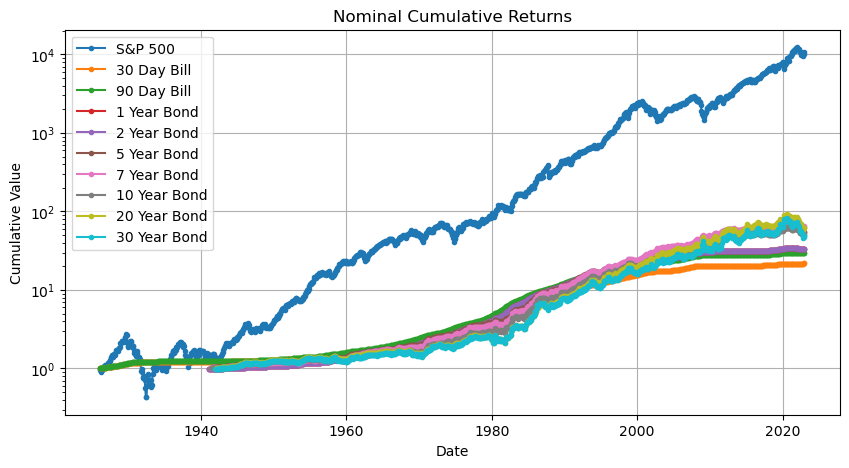

In [61]:
# Plotting nominal returns with a log-scale on the y-axis. I probably could've used a loop for less lines of code here...
plt.figure(figsize=(10, 5))
plt.title('Nominal Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.grid(True)
plt.semilogy(merged['caldt'], sp500_cum, label='S&P 500', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], t30_cum, label='30 Day Bill', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], t90_cum, label='90 Day Bill', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b1_cum, label='1 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b2_cum, label='2 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b5_cum, label='5 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b7_cum, label='7 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b10_cum, label='10 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b20_cum, label='20 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b30_cum, label='30 Year Bond', linestyle='-', marker='o', markersize=3)
plt.legend()
plt.show()

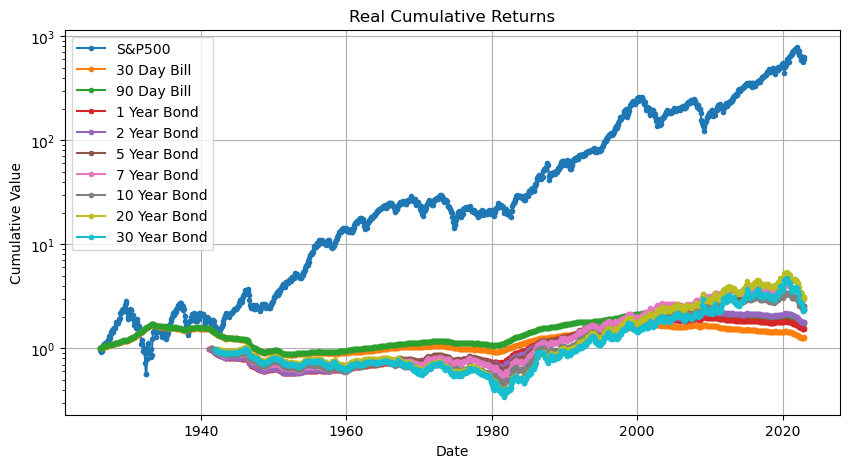

In [62]:
# Calculating real returns, adjusted for inflation
investments = ['vwretd', 't30ret', 't90ret', 'b1ret', 'b2ret', 'b5ret', 'b7ret', 'b10ret', 'b20ret', 'b30ret']
names = {'vwretd': 'S&P500', 't30ret': '30 Day Bill', 't90ret': '90 Day Bill', 'b1ret': '1 Year Bond', 'b2ret': '2 Year Bond', 'b5ret': 
         '5 Year Bond', 'b7ret': '7 Year Bond', 'b10ret': '10 Year Bond', 'b20ret': '20 Year Bond', 'b30ret': '30 Year Bond'}
plt.figure(figsize=(10, 5))
plt.title('Real Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.grid(True)
for i in investments:
    merged[i + ' adjusted'] = 1 + (merged[i] - merged['cpiret'])
    real_returns = merged[i + ' adjusted'].cumprod()
    plt.semilogy(merged['caldt'], real_returns, label= names[i], linestyle='-', marker='o', markersize=3)
plt.legend()
plt.show()    

In [63]:
# Calculating annualized difference between S&P500 and 30-year bond
sp500_ann_ret = (((sp500_cum.iloc[-1] - sp500_cum.iloc[1])/sp500_cum[1]) ** 1/98) - 1
t30_ann_ret = (((t30_cum.iloc[-1] - t30_cum.iloc[1])/t30_cum[1]) ** 1/98) - 1
ann_diff = sp500_ann_ret - t30_ann_ret
print(ann_diff * 100)

10299.175607746796


The annualized difference between returns on the S&P500 ('vretd') and 30 Year Bonds ('t30ret') is approximately 0.53%. This may be because of the additional risk investors associated with S&P500 stocks versus Treasury Bills, thereby creating an expectation of higher returns. This difference may also occur due to inflation, as inflation affects Treasury Bills more significantly than stocks.

# Problem 2

In [64]:
merged.describe()

,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret,vwretd adjusted,t30ret adjusted,t90ret adjusted,b1ret adjusted,b2ret adjusted,b5ret adjusted,b7ret adjusted,b10ret adjusted,b20ret adjusted,b30ret adjusted
count,1164.000000,1164.000000,1164.000000,1164.000000,1.165000e+03,1165.000000,1.164000e+03,1164.00000,1165.000000,1164.000000,974.000000,972.000000,980.000000,981.000000,981.000000,984.000000,984.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,984.000000,984.000000,981.000000,981.000000,980.000000,972.000000,974.000000
mean,0.009410,0.006304,0.011369,0.008444,4.728420e+09,368.372532,4.704517e+09,368.05756,557.673948,0.006387,0.004438,0.004585,0.004195,0.004387,0.004176,0.003744,0.003586,0.002930,0.002656,0.002429,1.006981,1.000227,1.000501,1.000475,1.000633,1.001062,1.001273,1.001085,1.001533,1.001379
std,0.054172,0.054242,0.067110,0.067201,8.020716e+09,191.934894,7.982123e+09,191.96191,897.231659,0.053908,0.030731,0.026672,0.019882,0.016567,0.013479,0.007439,0.004895,0.002872,0.002530,0.005283,0.054389,0.005277,0.005424,0.006480,0.008748,0.014473,0.017514,0.020736,0.027586,0.031630
min,-0.287461,-0.291524,-0.310002,-0.314686,6.146082e+06,89.000000,6.146082e+06,79.00000,4.430000,-0.299423,-0.147382,-0.105931,-0.066819,-0.070389,-0.058022,-0.036947,-0.017205,-0.009308,-0.000265,-0.020548,0.719162,0.941495,0.941532,0.941760,0.942422,0.927839,0.915472,0.925240,0.889717,0.848266
25%,-0.016868,-0.019211,-0.019244,-0.021843,3.266029e+07,90.000000,3.252151e+07,90.00000,22.790000,-0.019519,-0.010642,-0.008772,-0.006067,-0.003832,-0.001882,0.000185,0.000628,0.000359,0.000307,0.000000,0.979030,0.998006,0.998158,0.997239,0.996161,0.993921,0.991807,0.989741,0.986909,0.985012
50%,0.013000,0.009393,0.013631,0.010822,5.529739e+08,500.000000,5.512884e+08,499.00000,98.860000,0.009447,0.002686,0.002517,0.002488,0.002550,0.002399,0.002280,0.002488,0.002383,0.002192,0.002412,1.010092,1.000331,1.000638,1.000798,1.000692,1.000969,1.000656,1.000374,1.000325,1.000122
75%,0.038778,0.035916,0.042118,0.039566,7.782234e+09,500.000000,7.699438e+09,500.00000,914.620000,0.036043,0.019470,0.017521,0.013715,0.011917,0.009525,0.006752,0.005371,0.004555,0.004133,0.005098,1.036631,1.002638,1.003127,1.003551,1.004968,1.008624,1.010089,1.011937,1.015452,1.016285
max,0.414312,0.412291,0.680415,0.677637,4.205962e+10,506.000000,4.205962e+10,505.00000,4766.180000,0.422222,0.172202,0.152347,0.099993,0.107488,0.106119,0.084198,0.056059,0.021308,0.015158,0.058824,1.414312,1.022915,1.021071,1.044823,1.072962,1.094883,1.101048,1.104531,1.163614,1.191355


In [65]:
# Constructing summary statistic dataframe from scratch
['vwretd', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret']
returns = merged[['vwretd', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret']].copy() 
stats = pd.DataFrame({'mean': returns.mean(), 'var': returns.var(), 'stdev': returns.std(), 'max': returns.max(), 'min': returns.min(), 'num_missing': returns.isnull().sum(), 'zero_ret': returns.eq(0).sum()}).T
stats.columns = ['vwretd', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret']
stats.T

,mean,var,stdev,max,min,num_missing,zero_ret
vwretd,0.009410,0.002935,0.054172,0.414312,-0.287461,1.0,0.0
b30ret,0.004438,0.000944,0.030731,0.172202,-0.147382,191.0,0.0
b20ret,0.004585,0.000711,0.026672,0.152347,-0.105931,193.0,0.0
b10ret,0.004195,0.000395,0.019882,0.099993,-0.066819,185.0,0.0
b7ret,0.004387,0.000274,0.016567,0.107488,-0.070389,184.0,0.0
b5ret,0.004176,0.000182,0.013479,0.106119,-0.058022,184.0,0.0
b2ret,0.003744,0.000055,0.007439,0.084198,-0.036947,181.0,0.0
b1ret,0.003586,0.000024,0.004895,0.056059,-0.017205,181.0,0.0
t90ret,0.002930,0.000008,0.002872,0.021308,-0.009308,1.0,1.0
t30ret,0.002656,0.000006,0.002530,0.015158,-0.000265,1.0,2.0


My results are consistent with those of `df.describe()`, after comparing statistics in both dataframes.

In [66]:
annualized_mean_ret = pd.DataFrame(stats.T['mean'] * 12)
annualized_mean_ret

,mean
vwretd,0.112923
b30ret,0.053254
b20ret,0.055023
b10ret,0.050341
b7ret,0.052642
b5ret,0.050114
b2ret,0.044930
b1ret,0.043034
t90ret,0.035161
t30ret,0.031872


The above annualized historical mean returns do appear to be financially reasonable, as they are all between 3% and 5% for bonds and Treasury Bills, and is 11.3% for the S&P500, which is also reasonable. 

Many researchers and practitioners prefer to look at numbers which are standard deviations rather than numbers that numbers that are variances because standard deviations are the same units as the original variable. Furthermore, it is also easier to infer and create confidence intervals with the standard deviation.

In [67]:
# Comparing Pandas vs. NumPy standard deviations using vwretd
vwretd = merged['vwretd']
# removing nan values from NumPy array:
vwretd_arr = vwretd.to_numpy()
mask = np.isnan(vwretd_arr)
vwretd_arr = vwretd_arr[~mask]

[vwretd.std(), vwretd_arr.std()]

[0.05417239046026879, 0.05414911553311059]

As the standard deviation of the Pandas DataFrame for `vretd` is greater than that of the NumPy array for `vretd`, we can conclude that Pandas divides by $N - 1$ to calculate standard deviation, whereas NumPy divides by $N$ to calculate standard deviation. Note that all NaN values were removed from the NumPy array in order to calculate standard deviation.

The $N-1$ version of standard deviations is used because the standard deviation calculated with a factor of $\frac{1}{N-1}$ is calculated as an estimate of the standard deviation of the population the sample was generated from. This implies that the sample values the standard deviation was calculated from will fall closer to the sample mean than to the mean of the entire population, which in turn implies that the sample mean will most likely be smaller than the mean of the entire population. By using $N - 1$, the standard deviation will be a bit larger than if $N$ were used, serving as a "correction" for the sample mean being smaller than the population mean. In this case, as we have the entire population of data and do not need to take any samples, using the $N$ version of standard deviation is most appropriate.

In [68]:
# Calculating monthly sample volatility and annualized historical return volatility
# Constructing summary statistic dataframe from scratch
returns = merged[['vwretd', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret']].copy() 
mth_samp_vol = returns.std(ddof = 0) * (12 ** 0.5)

mth_samp_vol

vwretd    0.187578
b30ret    0.106400
b20ret    0.092346
b10ret    0.068837
b7ret     0.057359
b5ret     0.046670
b2ret     0.025756
b1ret     0.016949
t90ret    0.009945
t30ret    0.008760
dtype: float64

In [69]:
autocorrs = {}
for i in investments:
    autocorrs[i] = merged[i].autocorr(lag = 1)
autocorrs

{'vwretd': 0.076606546547312,
 't30ret': 0.9711923831030377,
 't90ret': 0.9035779084875946,
 'b1ret': 0.4507700588274856,
 'b2ret': 0.2755958272640144,
 'b5ret': 0.13531838097080173,
 'b7ret': 0.10149195471372383,
 'b10ret': 0.08197467504559315,
 'b20ret': 0.06745764802046678,
 'b30ret': 0.08312149167857942}

For most return series, returns are indeed mostly uncorrelated. However, for the 30-Year Treasury Bill return series, returns seem to be mostly correlated.

Log returns are less than returns because the log return is less than the return because of the nature of the logarithm function, which returns smaller numbers for values less than $1$. Finance researchers and practitioners prefer to use natural logarithms rather than base $2$ or base $10$ because $e$ is used in interest and growth/decay calculations.

In [70]:
# Computing Black-Scholes volatility; first removing all rows that have either 'NaN' zero

returns = merged[['vwretd', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret']].copy()
returns = returns.dropna()
returns = returns[(returns > 0).all(axis=1)]
returns = returns.to_numpy()
returns += 1

log_returns = np.log(returns)
log_returns = pd.DataFrame(log_returns, columns = ['vwretd', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret'])
log_returns.std(ddof = 0)

vwretd    0.026786
b30ret    0.022165
b20ret    0.020483
b10ret    0.016436
b7ret     0.014531
b5ret     0.012124
b2ret     0.008286
b1ret     0.005983
t90ret    0.003225
t30ret    0.002598
dtype: float64

While for some assets there is a bit of a difference between the Black-Scholes volatility and the volatility calculated using non-log returns, the values are one order of magnitude of each other.

# Problem 3

In [71]:
sp500_daily = pd.read_csv('ze0nvkelmjarmgyv.csv')

In [72]:
sp500_daily['caldt'] = pd.to_datetime(sp500_daily['caldt'])

In [73]:
sp500_daily.head(1)

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
0,1925-12-31,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,NaN,NaN


In [74]:
sp500_daily.tail(1)

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
25548,2022-12-30,-0.002393,-0.002456,-0.004163,-0.00432,3.351180e+10,503,3.358943e+10,503.0,3839.5,-0.002541


In [75]:
sp500_daily.shape

(25549, 11)

In [76]:
dollar_ret = (1 + sp500_daily['vwretd']).cumprod()
dollar_ret[25548]

9806.65006047523

In [77]:
dollar_ret

0                NaN
1           1.004297
2           1.002934
3           0.998318
4           0.998854
            ...     
25544    9818.994914
25545    9778.501379
25546    9660.572653
25547    9830.173666
25548    9806.650060
Name: vwretd, Length: 25549, dtype: float64

In [78]:
sp500_daily['daily_returns'] = dollar_ret

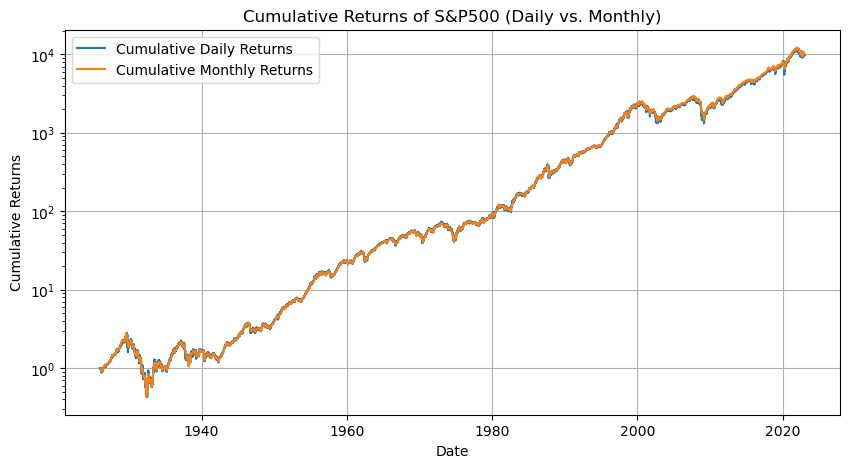

In [79]:
# Comparing cumulative daily and monthly nominal returns

sp500_monthly_returns = sp500
sp500_monthly_returns['monthly_returns'] = sp500_cum
# Convert date columns to datetime
sp500_monthly_returns['caldt'] = pd.to_datetime(sp500['caldt'])

# setting date column as the index for both dataframes
sp500_daily.set_index('caldt', inplace=True)
sp500_monthly_returns.set_index('caldt', inplace=True)


fig, ax = plt.subplots(figsize=(10, 5))

# Plot cumulative daily returns
ax.plot(sp500_daily.index, sp500_daily['daily_returns'], label='Cumulative Daily Returns')

# Plot cumulative monthly returns
ax.plot(sp500_monthly_returns.index, sp500_monthly_returns['monthly_returns'], label='Cumulative Monthly Returns')

ax.set_yscale('log')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Cumulative Returns of S&P500 (Daily vs. Monthly)')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


In [80]:
sp500_daily

,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn,daily_returns
caldt,,,,,,,,,,,
1925-12-31,NaN,NaN,NaN,NaN,1.523683e+07,89,NaN,NaN,NaN,NaN,NaN
1926-01-02,0.004297,0.004297,0.002941,0.002941,1.531969e+07,89,1.523683e+07,79.0,NaN,NaN,1.004297
1926-01-04,-0.001357,-0.001357,0.001036,0.001036,1.529890e+07,89,1.531969e+07,80.0,NaN,NaN,1.002934
1926-01-05,-0.004603,-0.004653,-0.005856,-0.006063,1.522771e+07,89,1.529890e+07,80.0,NaN,NaN,0.998318
1926-01-06,0.000537,0.000537,0.000888,0.000888,1.523589e+07,89,1.522771e+07,80.0,NaN,NaN,0.998854
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.005843,0.005815,0.006934,0.006918,3.355862e+10,503,3.336460e+10,503.0,3844.82,0.005868,9818.994914
2022-12-27,-0.004124,-0.004200,0.000041,-0.000041,3.341769e+10,503,3.355862e+10,503.0,3829.25,-0.004050,9778.501379
2022-12-28,-0.012060,-0.012068,-0.013825,-0.013839,3.301442e+10,503,3.341769e+10,503.0,3783.22,-0.012021,9660.572653


In [81]:
sp500_daily_logret = sp500_daily.drop(columns = ['vwretd', 'vwretx', 'ewretd', 'ewretx', 'totval', 'totcnt', 'usdval', 'spindx', 'sprtrn', 'usdcnt'])

In [82]:
sp500_daily_logret.columns

Index(['daily_returns'], dtype='object')

The returns should be almost identical, if not completely identical. This is because the aggregate returns of the daily data each month should be equal to the cumulative monthly return each month. As shown in the plot, this is indeed the case.

In [83]:
# Creating series of daily log returns:
sp500_daily_logret = sp500_daily_logret.dropna()
sp500_daily_logret = sp500_daily_logret[(sp500_daily_logret > 0).all(axis=1)]

sp500_daily_logret = sp500_daily_logret.to_numpy()
sp500_daily_logret = np.log(sp500_daily_logret)
sp500_daily_logret = pd.DataFrame(sp500_daily_logret, columns = ['daily_returns'])
sp500_daily_logret.set_index('caldt', inplace=True)

sp500_daily_logret['Month'] = sp500_daily_logret.index.to_period('M')
monthly_std_logret = sp500_returns.groupby('Month')['Returns'].std()
monthly_std_logret = monthly_std_logret.reset_index()

KeyError: "None of ['caldt'] are in the columns"